# Test No. 01

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset = pd.read_excel("Tesla sales data.xlsx")

In [3]:
dataset

,Model,Period,Country,Purchase type,Version,Price,Gross Profit
0,Model S,201601,US,Deposit,75D AWD,75700,22407.268985
1,Model S,201601,US,Cash purchase,75D AWD,75700,22407.268985
2,Model S,201601,US,Cash purchase,75 RWD,70700,20927.264428
3,Model S,201601,US,Cash purchase,75 RWD,70700,20927.264428
4,Model S,201601,US,Cash purchase,75 RWD,70700,20927.264428
...,...,...,...,...,...,...,...
85587,Model S,201710,US,Cash purchase,75 RWD,70700,15219.781180
85588,Model S,201710,US,Cash purchase,75 RWD,70700,15219.781180
85589,Model S,201710,US,Cash purchase,75 RWD,70700,15219.781180
85590,Model X,201710,US,Cash purchase,P90D,74000,18406.837858


In [4]:
dataset["Period"] = dataset["Period"].astype(str)
dataset["Period"].dtype

dtype('O')

In [5]:
dataset['Period'] = dataset['Period'].str[0:4]

In [6]:
dataset["Period"]

0        2016
1        2016
2        2016
3        2016
4        2016
         ... 
85587    2017
85588    2017
85589    2017
85590    2017
85591    2017
Name: Period, Length: 85592, dtype: object

In [7]:
dataset.head()

,Model,Period,Country,Purchase type,Version,Price,Gross Profit
0,Model S,2016,US,Deposit,75D AWD,75700,22407.268985
1,Model S,2016,US,Cash purchase,75D AWD,75700,22407.268985
2,Model S,2016,US,Cash purchase,75 RWD,70700,20927.264428
3,Model S,2016,US,Cash purchase,75 RWD,70700,20927.264428
4,Model S,2016,US,Cash purchase,75 RWD,70700,20927.264428


In [8]:
data = dataset.groupby(['Period','Model','Version'])

In [9]:
data.size()

Period  Model    Version
2016    Model S  60D AWD     4611
                 75 RWD      8487
                 75D AWD     4051
                 90D AWD     2199
        Model X  90D         6765
                 P90D       17137
2017    Model S  60D AWD     4421
                 75 RWD      8005
                 75D AWD     4609
                 90D AWD     2242
        Model X  90D         6547
                 P90D       16518
dtype: int64

In [10]:
tesla = data[["Price","Gross Profit"]]

In [11]:
len(tesla.groups)

12

In [12]:
# tesla["Unit Sold"] = len

In [13]:
tesla.agg(func = ["sum", lambda x: len(x)])

Price             Gross Profit           
                               sum <lambda_0>           sum <lambda_0>
Period Model   Version                                                
2016   Model S 60D AWD   342136200       4611  9.914472e+07     4611.0
               75 RWD    600030900       8487  1.497561e+08     8487.0
               75D AWD   306660700       4051  1.061040e+08     4051.0
               90D AWD   195051300       2199  6.398013e+07     2199.0
       Model X 90D       541200000       6765  1.500089e+08     6765.0
               P90D     1268138000      17137  3.804198e+08    17137.0
2017   Model S 60D AWD   328038200       4421  9.637541e+07     4421.0
               75 RWD    565953500       8005  1.396392e+08     8005.0
               75D AWD   348901300       4609  1.204282e+08     4609.0
               90D AWD   198865400       2242  6.337160e+07     2242.0
       Model X 90D       523760000       6547  1.448825e+08     6547.0
               P90D     1222332000      16518  3.642491e+08    16518.0

In [14]:
data = pd.DataFrame(columns=["Year","Model","Version","Unit Sold","Revenue","Gross Profit","COGS"])
data

,Year,Model,Version,Unit Sold,Revenue,Gross Profit,COGS


In [15]:
dataset['Version'].unique()

array(['75D AWD', '75 RWD', '90D AWD', '60D AWD', '90D', 'P90D'],
      dtype=object)

In [16]:
for i in dataset['Period'].unique():
    for j in dataset['Model'].unique():
        for k  in dataset["Version"].unique():
            temp = dataset.loc[(dataset["Period"] == i) & (dataset["Model"] == j) & (dataset["Version"] == k)]
            if not temp.empty:
                unit = len(temp)
                revenue = temp['Price'].sum()
                gross_profit = temp['Gross Profit'].sum()
                COGS = revenue-gross_profit
                
                data = data.append({"Year":i,
                                    "Model":j,
                                    "Version":k,
                                    "Unit Sold":unit,
                                    "Revenue":revenue,
                                    "Gross Profit":gross_profit,
                                    "COGS":COGS},
                                    ignore_index=True)
                 
                


In [17]:
data

,Year,Model,Version,Unit Sold,Revenue,Gross Profit,COGS
0,2016,Model S,75D AWD,4051,306660700,1.061040e+08,2.005567e+08
1,2016,Model S,75 RWD,8487,600030900,1.497561e+08,4.502748e+08
2,2016,Model S,90D AWD,2199,195051300,6.398013e+07,1.310712e+08
3,2016,Model S,60D AWD,4611,342136200,9.914472e+07,2.429915e+08
4,2016,Model X,90D,6765,541200000,1.500089e+08,3.911911e+08
5,2016,Model X,P90D,17137,1268138000,3.804198e+08,8.877182e+08
6,2017,Model S,75D AWD,4609,348901300,1.204282e+08,2.284731e+08
7,2017,Model S,75 RWD,8005,565953500,1.396392e+08,4.263143e+08
8,2017,Model S,90D AWD,2242,198865400,6.337160e+07,1.354938e+08
9,2017,Model S,60D AWD,4421,328038200,9.637541e+07,2.316628e+08


In [18]:
n = data.loc[(data['Model'] == j) & (data['Year'] == i)]['Version']
n,j,i

(10     90D
 11    P90D
 Name: Version, dtype: object,
 'Model X',
 '2017')

In [19]:
x = np.linspace(0, 5, 11)
y = np.arange(0,5,11)
n = len(data.loc[(data['Model'] == j) & (data['Year'] == i)]['Version'])
[n,x,y]

[2, array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]), array([0])]

2016 Model S
2016 Model X
2017 Model S
2017 Model X


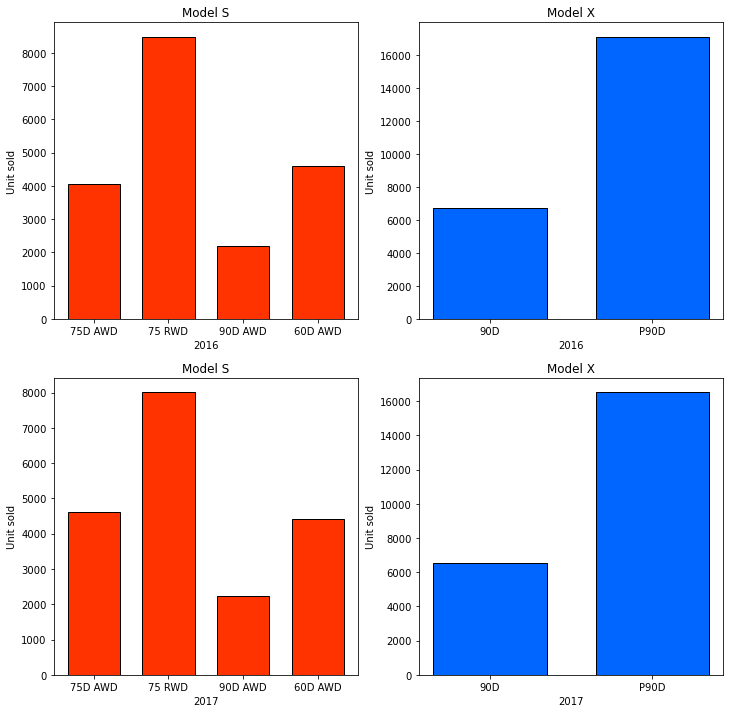

In [20]:
fig, ax = plt.subplots(len(data['Year'].unique()),len(data['Model'].unique()), figsize=(12,12))

c = 0
for i in data['Year'].unique():
    d = 0
    for j in data['Model'].unique():
        n = len(data.loc[(data['Model'] == j) & (data['Year'] == i)]['Version'])
        x = np.arange(0,n)
        height = data.loc[(data['Model'] == j) & (data['Year'] == i)]
        print(i,j)
        if d%2 == 0:
            ax[c][d].bar(x,height["Unit Sold"],width = 0.7,color = (1, 51/255, 0),edgecolor = "black")
        else:
            ax[c][d].bar(x,height["Unit Sold"],width = 0.7,color = (0, 102/255,1),edgecolor = "black")
        ax[c][d].set_xlabel(i)
        ax[c][d].set_ylabel("Unit sold")
        ax[c][d].set_title(j)
        ax[c][d].set_xticks(x)
        ax[c][d].set_xticklabels(height["Version"])
        d +=1
    c+=1
plt.savefig("exam1.jpg")
plt.show()

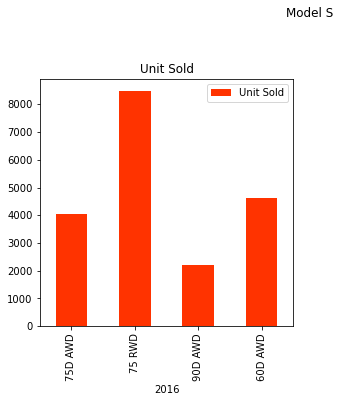

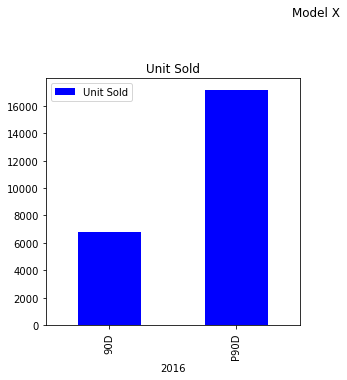

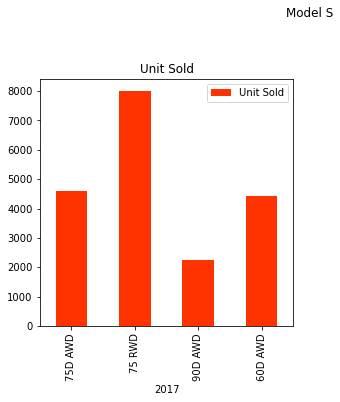

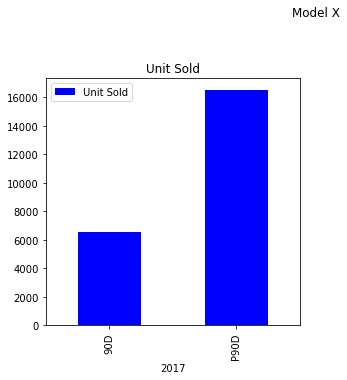

In [21]:
c = 0
for i in data['Year'].unique():
    d = 0
    for j in data['Model'].unique():
        if j == 'Model S':
            a = (1, 51/255, 0)
        else:
            a = 'b'
        ax[c][d] = data.loc[(data['Year'] == i) & (data['Model'] == j)].plot.bar(subplots = True,
                    x = 'Version' ,
                    y = 'Unit Sold',
                    title = j,
                    xlabel = i,
                    layout = ( len(data['Year'].unique()),len( data['Model'].unique())),
                    figsize = (10,10),                 
                    legend = True ,
                    color = a)
        d+=1
    c+=1

In [22]:
np.linspace(0,11,12)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [23]:
dataset


,Model,Period,Country,Purchase type,Version,Price,Gross Profit
0,Model S,2016,US,Deposit,75D AWD,75700,22407.268985
1,Model S,2016,US,Cash purchase,75D AWD,75700,22407.268985
2,Model S,2016,US,Cash purchase,75 RWD,70700,20927.264428
3,Model S,2016,US,Cash purchase,75 RWD,70700,20927.264428
4,Model S,2016,US,Cash purchase,75 RWD,70700,20927.264428
...,...,...,...,...,...,...,...
85587,Model S,2017,US,Cash purchase,75 RWD,70700,15219.781180
85588,Model S,2017,US,Cash purchase,75 RWD,70700,15219.781180
85589,Model S,2017,US,Cash purchase,75 RWD,70700,15219.781180
85590,Model X,2017,US,Cash purchase,P90D,74000,18406.837858
